<Axes: >

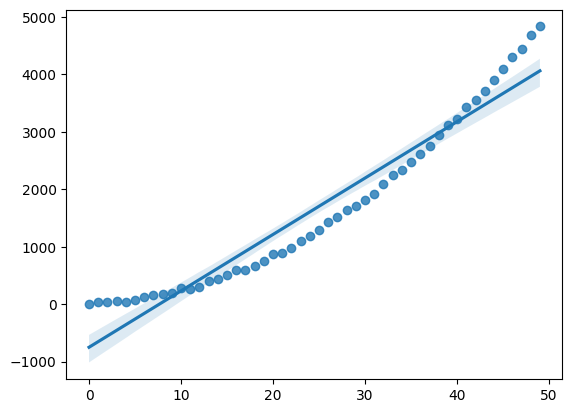

In [1]:
from sklearn.linear_model import LinearRegression
from numpy.typing import NDArray
import numpy as np
import seaborn as sns

std: float = 80.

x: NDArray = np.arange(0, 50, 1).astype(np.float32)
y: NDArray = np.random.rand(50) * std + np.array(list(map(lambda x: 2 * x**2 + 3, x))).astype(np.float32)

sns.regplot(x = x, y = y)

$f(x) = 2 x^2 + 3$

# Bias / Sesgo

In [2]:
model = LinearRegression()
model.fit(X = x.reshape(-1, 1), y = y.reshape(-1, 1))

LinearRegression()

In [3]:
( model.predict(np.array([[25]])) - 25 ** 2)**2

array([[1165669.82561303]])

$f(x) = a(x - k)^2 + b$

$f(x) = ax^2 + bx + c$

$M(x) = w_1x^2 + w_2x + b$

$f_1(x) = w_1 x + b$

$f_1(x, y) = w_1 x + w_2 y + b$

$f(x, y) = w_1 x + w_2 y + b$

$x = x $

$ y = x^2$ 

In [4]:
new_X: NDArray = np.stack([x, x**2], dtype = np.float32)

In [5]:
model = LinearRegression()
model.fit(new_X.transpose(), y)

LinearRegression()

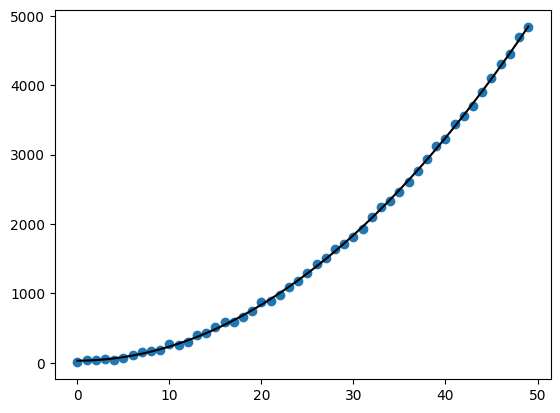

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.plot(x, model.predict(new_X.transpose()), c = 'k')

<Axes: >

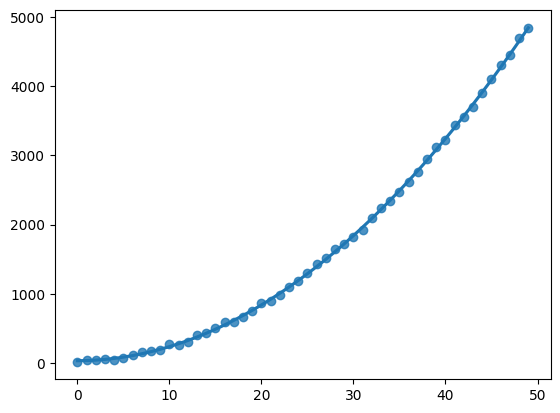

In [7]:
sns.regplot(x = x, y = y, order = 2)

In [8]:
from sklearn.neural_network import MLPRegressor

In [9]:
model = MLPRegressor((25, 37, 50, 100, 50, 25), max_iter = 1000)

In [10]:
from sklearn.preprocessing import StandardScaler

y = y.reshape(-1, 1)
x = x.reshape(-1, 1)

y_scaler = StandardScaler().fit(y)
y_norm = y_scaler.transform(y)

x_scaler = StandardScaler().fit(x)
x_norm = y_scaler.transform(x)

model.fit(X = x_norm, y = y_norm)

/data/env11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(25, 37, 50, 100, 50, 25), max_iter=1000)

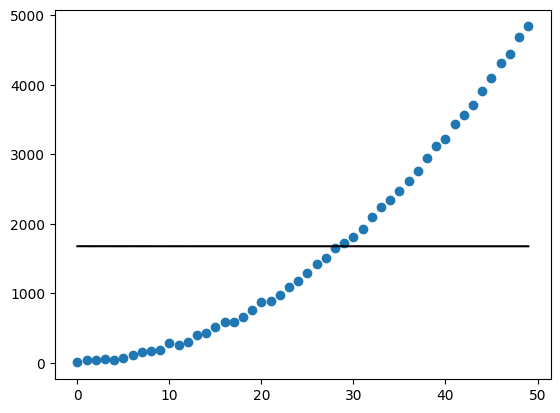

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(x, y)
x_plot = x
y_plot = y_scaler.inverse_transform(model.predict(x_norm).reshape(-1, 1))
                                    
ax.plot(x_plot, y_plot, c = 'k')